This notebook's purpose is to show how to use the sklearn-like models pipeline for text classification.

The pipeline trains a selected classifier on a selected dataset, training a specified vectorizer previously. Then, it computes the text classification evaluation metrics and saves them in a JSON file in a specified path.

Apart from the "SklearnClassificationPipeline" class, all you need to import is a selected sklearn-like classifier and any sklearn vectorizer, like CountVectorizer or TfidfVectorizer.

In [1]:
import warnings

warnings.filterwarnings("ignore")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from embeddings.pipeline.sklearn_classification import SklearnClassificationPipeline

Variables you need to pass to the SklearnClassificationPipeline class:
- __dataset kwargs__: name of the dataset and names of X and Y columns, respectively. You can pass them to the class from a dict, like in all examples below, or directly.
- __output_path__: a path where you want a file with evaluation metrics saved.

The remaining elements are optional. Note that arguments __"embeddings_kwargs"__ and __"classifier_kwargs"__ are passed to the class __without "**"__.
In this notebook we are using the POLEMO2 dataset - the details about it can be found [here](https://huggingface.co/datasets/clarin-pl/polemo2-official).

In [2]:
embeddings_kwargs = {
    "max_features": 10000,
    "max_df": 10
}

classifier_kwargs = {
    "n_estimators": 100
}

evaluation_filename = "adaboost_tfidf_evaluation.json"  #default name: evaluation_filename.json
output_path = "."

adaboost_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=AdaBoostClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename,
    classifier_kwargs=classifier_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [8]:
adaboost_tfidf_result = adaboost_tfidf_pipeline.run()
print(adaboost_tfidf_result)

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

{'accuracy': {'accuracy': 0.46707317073170734}, 'f1__average_macro': {'f1': 0.28786594761171036}, 'recall__average_macro': {'recall': 0.3487450627468627}, 'precision__average_macro': {'precision': 0.3134423929263458}, 'data': {'y_pred': array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
svm_kwargs = {
    "kernel": "linear",
    "C": 0.6
}

evaluation_filename_svm_tdidf = "svm_tfidf_evaluation.json"

svm_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=SVC,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_svm_tdidf,
    classifier_kwargs=svm_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [9]:
svm_tfidf_result = svm_tfidf_pipeline.run()
print(svm_tfidf_result)

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

{'accuracy': {'accuracy': 0.6292682926829268}, 'f1__average_macro': {'f1': 0.538089503921292}, 'recall__average_macro': {'recall': 0.5331545169631904}, 'precision__average_macro': {'precision': 0.6747768805779856}, 'data': {'y_pred': array([1, 2, 2, 2, 3, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 3, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 3, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 3, 1, 2, 1, 1, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2,

In [6]:
embeddings_kwargs = {
    "max_features": 10000
}

xgb_kwargs = {
    "n_estimators": 200,
    "max_depth": 7
}

evaluation_filename_xgb_tdidf = "xgb_tfidf_evaluation.json"

xgb_tfidf_pipeline = SklearnClassificationPipeline(
    dataset_name="clarin-pl/polemo2-official",
    input_column_name="text",
    target_column_name="target",
    output_path=output_path,
    classifier=XGBClassifier,
    vectorizer=TfidfVectorizer,
    evaluation_filename=evaluation_filename_xgb_tdidf,
    classifier_kwargs=xgb_kwargs,
    embedding_kwargs=embeddings_kwargs
)

In [10]:
xgb_tfidf_result = xgb_tfidf_pipeline.run()
print(xgb_tfidf_pipeline.run())

No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

[12:55:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


No config specified, defaulting to: pol_emo2/all_text
Reusing dataset pol_emo2 (/Users/mariuszkossakowski/.cache/huggingface/datasets/clarin-pl___pol_emo2/all_text/0.0.0/2b75fdbe5def97538e81fb120f8752744b50729a4ce09bd75132bfc863a2fd70)


  0%|          | 0/3 [00:00<?, ?it/s]

[13:10:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'accuracy': {'accuracy': 0.7573170731707317}, 'f1__average_macro': {'f1': 0.7383632851951776}, 'recall__average_macro': {'recall': 0.7279708041839421}, 'precision__average_macro': {'precision': 0.7527270564328854}, 'data': {'y_pred': array([1, 3, 2, 2, 3, 0, 0, 0, 1, 3, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2,
       2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3,
       0, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 3, 2, 0, 1,
       0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 3, 1, 1, 1, 2, 1, 1,
       3, 1, 0, 1, 2, 3, 1, 1, 2, 1, 3, 2, 3, 0, 1, 1, 2, 3, 2, 2, 2, 3,
       1, 1, 1, 3, 1, 0, 2, 1, 0, 3, 0, 2, 3, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 1, 2, 1, 0, 2, 1, 1, 3,

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
methods = ["AdaBoost", "SVM", "XGBoost"]
f1_scores = [adaboost_tfidf_result["f1__average_macro"]["f1"], svm_tfidf_result["f1__average_macro"]["f1"],
             xgb_tfidf_result["f1__average_macro"]["f1"]]
results_df = pd.DataFrame(data={"method": methods, "f1": f1_scores})

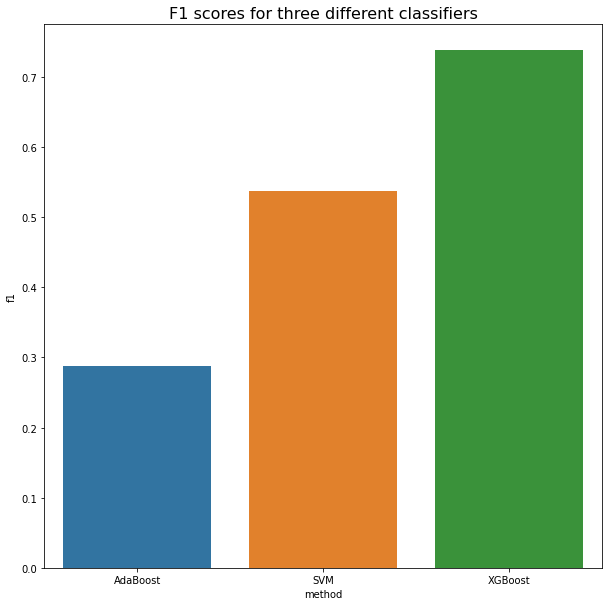

In [21]:
plt.figure(figsize=(10, 10))
sns.barplot(data=results_df, x="method", y="f1")
plt.title("F1 scores for three different classifiers", fontsize=16)
plt.show()

In this very simple experiment, the XGBoost turned out to be the best. Its way to learn basing on gradients of previous classifiers could be decisive.